### Programming Assignment - 1
### Logistic Regression
#### Naga Kartheek Peddisetty, 50538422

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

####  The class is logistic regression. Initializing an instance of the class with two optional parameters learning rate and number of iterations.
#### Sigmoid function:
#### sigmoid = 1 / (1 + e^-z)
#### For Logistic Regression
#### z = w.T * x + b ; Here w = weight and b = bias

#### The fit method trains the logistic regression model using Stochastic Gradient Descent optimization algorithm. It takes the input features 'X' and target 'y'.
#### Iterates over the data for a number of iterations and updates the weights and bias at each step to minimize the logistic loss function.
#### dw and db computes the weights and bias with respect to loss.
#### 'loss' calculates the loss using log loss function.
#### log loss = $ \sum $[-(y * log(y_pred) + (1 - y) * log(1 - y_pred))]

#### Predict_prob function predicts the probability.
#### Probability (P) =  1 / (1 + e^-(w.T * x + b))
#### And predict method is used to predict the class labels, creates an array where assigning each element as 1 if the probability p is greater than 0.5, and 0 otherwise.

In [3]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.l = []    ### empty list to store loss values during training for each iteration.
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_observations, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            loss = 0
            for i in range(n_observations):
                y_pred = self.sigmoid(np.dot(X[i], self.weights) + self.bias)
                
                dw = np.dot(X[i].T, (y_pred - y[i]))
                db = (y_pred - y[i])
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                # Calculating loss using log loss function
                loss += -(y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
            
            self.l.append(loss / n_observations)
            
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        p = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in p])

#### Defining a class LogisticRegression_OR  to implement OneVsRest logistic regression for multiclass classification by training a binary classifier for each class. 
#### Because the target variable 'y' has 3 classes 'setosa', 'virginica', and 'versicolor'.

In [4]:
class LogisticRegression_OR:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.models = []
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
    def fit(self, X, y):
        self.c = np.unique(y)
        for j in self.c:
            y_bin = np.where(y == j, 1, 0)
            model = LogisticRegression(self.learning_rate, self.n_iterations)
            model.fit(X, y_bin)
            self.models.append(model)
    
    def predict(self, X):
        prob = np.array([model.predict_proba(X) for model in self.models]).T
        return np.argmax(prob, axis=1)

In [5]:
# Load and prepare the dataset

iris = load_iris()
X = iris.data
y = iris.target

print('Dimension of X: ', X.shape)
print('Dimension of y: ', y.shape)

# For visualization purpose using pandas dataframe

x1 = pd.DataFrame(iris['data'], columns=iris['feature_names']) 
y1 = pd.DataFrame(iris['target'], columns=['species'])

df = pd.concat([x1, y1], axis=1)

print('\nTop 5 rows of the dataset:')
display(df.head(5))
print("\n Summary of the dataset:")
display(df.describe())

Dimension of X:  (150, 4)
Dimension of y:  (150,)

Top 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



 Summary of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Splitting the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Dimension of X_train: ', X_train.shape)
print('Dimension of X_test: ', X_test.shape)
print('Dimension of y_train: ', y_train.shape)
print('Dimension of y_test: ', y_test.shape)

Dimension of X_train:  (120, 4)
Dimension of X_test:  (30, 4)
Dimension of y_train:  (120,)
Dimension of y_test:  (30,)


In [7]:
# Scale the features
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

# Initialize and train the logistic regression model with OvR strategy
log_model = LogisticRegression_OR(learning_rate=0.01, n_iterations=1000)
log_model.fit(X_train_scaled, y_train)

# Make predictions on train and test data
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

print('Dimension of y_train_pred: ', y_train_pred.shape)
print('Dimension of y_test_pred: ', y_test_pred.shape)

Dimension of y_train_pred:  (120,)
Dimension of y_test_pred:  (30,)


### Evaluation metrics:

In [8]:
#### For train data
## macro will calculate the metrics for individual class and then average all classes.

train_conf_matr = confusion_matrix(y_train,y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro') 
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

print("Confusion Matrix for train:\n", train_conf_matr)
print(f"train accuracy: {train_accuracy * 100:.2f} %")
print(f"train precision: {train_precision * 100:.2f} %")
print(f"train recall: {train_recall * 100:.2f} %")
print(f"train F1 score: {train_f1 * 100:.2f} %")

#### For test data

test_confusion_mat = confusion_matrix(y_test,y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print('------------------------------------')
print("Confusion Matrix for test:\n", test_confusion_mat)
print(f"test accuracy: {test_accuracy * 100:.2f} %")
print(f"test precision: {test_precision * 100:.2f} %")
print(f"test recall: {test_recall * 100:.2f} %")
print(f"test F1 score: {test_f1 * 100:.2f} %")

Confusion Matrix for train:
 [[37  0  0]
 [ 0 41  3]
 [ 0  2 37]]
train accuracy: 95.83 %
train precision: 95.95 %
train recall: 96.02 %
train F1 score: 95.97 %
------------------------------------
Confusion Matrix for test:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
test accuracy: 96.67 %
test precision: 95.24 %
test recall: 96.97 %
test F1 score: 95.85 %


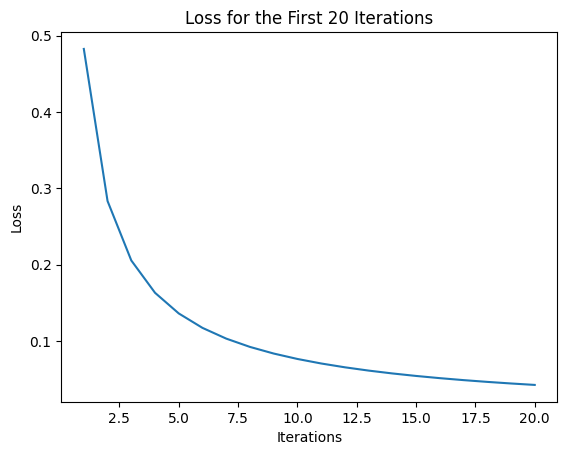

In [9]:
# Plot loss for the first 20 iterations
plt.plot(range(1, 21), log_model.models[0].l[:20])
plt.title('Loss for the First 20 Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Plotting the Decision boundary using two features

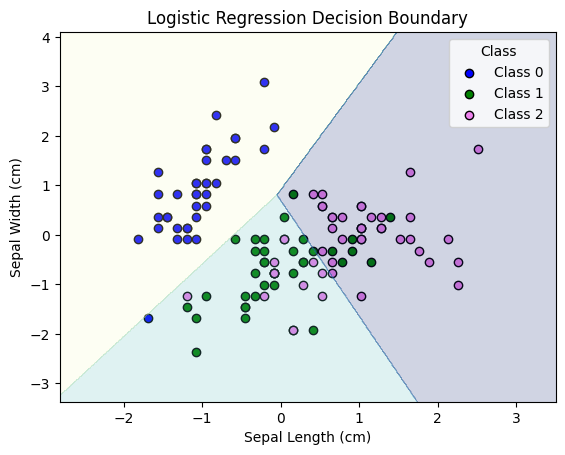

In [10]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the features
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

# Initialize and train the logistic regression model with OvR strategy
log_model = LogisticRegression_OR(learning_rate=0.01, n_iterations=1000)
log_model.fit(X_train_scaled, y_train)

y_test_pred = log_model.predict(X_test_scaled)

# Define a function to plot linear decision boundary
def logistic_decision_boundary(X, y, model):
    
    colors = ['blue', 'green', 'violet']
    # Plot the training points
    for i, col in zip(np.unique(y), colors):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=col, edgecolor='k', label=f'Class {i}')
        
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    e, f = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[e.ravel(), f.ravel()])
    Z = Z.reshape(e.shape)
    
    plt.contourf(e, f, Z, alpha=0.2, cmap=plt.cm.YlGnBu)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend(title='Class')
    plt.savefig('C:/Users/nagak/Downloads/Programming Assignment - 1/logistic_regression_Plot.png')  ### To save the plot
    plt.show()
    
logistic_decision_boundary(X_train_scaled, y_train, log_model)